<h3 align="center">NEU 437/537</h3>
<h4 align="center">Princeton University, Spring 2022</h4>

---
## Homework 4: Reinforcement Learning
#### Due: Friday, Apr 29

---
### Formatting Instructions
- Please prepare your homework submission completely within your own copy of this colab notebook.

- For each problem or sub-problem, please **limit yourself to one Code cell and/or one Markdown cell** as appropriate (switch between them by using the menu at the top, or the shortcuts `Ctrl+M M` for Markdown and `Ctrl+M Y` for Code). 

- **Submitting your homework**:  Please submit an .ipynb file via the assignment tab in Canvas. (From your notebook, File->Download->Download .ipynb).  Late submissions will be penalized 10% per day.

- **Test before submmitting**: Before submitting, make sure to verify that your code runs without  errors by selecting `Runtime -> Restart & Run All`. 


---
Setup: let's run a magic command (to force inline plotting) and then import some of our favorite packages.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In this problem set, you will explore 2 types of reinforcement learning problems: multi-armed bandits and Markov Decision Processes. 

Reinforcement learning is learning what to do (i.e. how to make decisions) to maximize a numerical reward signal. Unlike in supervised learning, the learner is not told the correct answer, but must discover "good" decisions by trial and error. 

Thus, one of the main elements of a reinforcement learning system is a reward signal. The reward signal defines the goal of a reinforcement learning problem. On each time
step, the environment sends to the reinforcement learning agent a single number called
the **reward**. The agent’s sole objective is to maximize the total reward it receives over
the long run. 

## Plotting notes

Whenever you are asked to plot anything, make sure you provide labels (axes, legends, etc.) where appropriate. 

# Question 1: A $k$-armed Bandit Problem

Consider the following problem. Suppose you are given  $k$ different options, or actions, to choose from, and every time step, you have to select 1 action among these $k$ options. After each choice you receive a numerical reward chosen from a fixed probability distribution that depends on the action you selected. For example, you might be faced with $k$ slot machines in a casino, each of which will give you a random reward (but drawn from a fixed probability distribution, particular to each slot machine). Your goal is to maximize the expected total reward over some time period.

**1a**. Create 10 "bandits", which we will model with random number generators. Each generator (i.e., each bandit) draws numbers from a normal distribution, with mean $\mu$ and variance 1. First create the means for each bandit by sampling their means $\mu_a$ from a normal distribution with mean 0 and variance 5:
$$\mu \sim \mathcal N(0, 5)$$
 Then create a function, such that when you call that function and pass it a particular $\mu_a$, you receive a real number output, the result of an encounter with that bandit. This simulates a slot machine that you can "call" for reward. i.e. The reward $R_t$ that you will receive at time $t$ will be
 $$ R_t \sim \mathcal N(\mu_a, 1)$$
where $\mu_a$ is the mean of the bandit $a$ that you chose.

 Historical Note: These are called $k$-bandit problems in the reinforcement learning literature. "The name comes from imagining a gambler at a row of slot machines (sometimes known as 'one-armed bandits'), who has to decide which machines to play, how many times to play each machine and in which order to play them, and whether to continue with the current machine or try a different machine." 

 Source: Wikipedia https://en.wikipedia.org/wiki/Multi-armed_bandit

<font color="red"> Your answer in code </font>

**(2 points)**


In [9]:
k = 10
mu = 0
var = 5
sd=np.sqrt(var)
seed=0

def create_bandits(k=k, mu=mu, sd=sd, seed=seed):
    ''' 
    creates a k arms bandit
    
    input
        k (int) number of arms
        mu (float) mean of arms
        sd (float) sd of arms
        seed (int) randomizartion seed

        
    returns 
        mean of arms
    '''
    
    np.random.seed(seed)
    bandits = np.random.normal(mu, sd, size=k)
    np.random.seed(None) #reset
    
    return bandits

def pull_bandit(arm, bandits, sd=1, seed=seed):
    '''
    get bandit reward from a k arms bandit
    
    get
        a (int) selected arm index
        bandits (array) of bandit means
        sd (float) bandit sd
        
    returns 
        reward for action a
        
    '''
    np.random.seed(seed)
    r = np.random.normal(bandits[arm],sd)
    np.random.seed(None) #reset
    return r

## example
bandits = create_bandits(k=k, mu=mu, sd=sd, seed=seed)
r0 = pull_bandit(0,bandits)
print(r0)

5.708593307419338


**1b**. Suppose you are the creator of these bandits (which you are), so that you know everything there is to know about the bandits in advance (except for the random sequence generated by each bandit). There is an optimal strategy (in terms of maximizing your reward rate) for how to choose among the bandits, called the **greedy strategy**. 
* Describe this strategy.

<font color="red"> Your answer in red text </font>

* Why is this strategy called the greedy strategy? **(2 points)**

<font color="red"> Your answer in red text </font>



**1c**. Suppose that you do
not know anything about the bandits. You can only "query" each bandit to see the reward $R_t$ it will give you at time $t$. To select the best action here, you can use an  **action-value
function**, which specifies the average amount of reward the agent will receive by selecting an action $a$ is
$$q_{*}(a) = \mathbb{E}\left[R_{t} \mid A_{t}=a\right]$$
$\mathbb{E}$ is the expected value, $A_t$ is the action at time $t$ (i.e. when bandit $a$ is chosen).



* Since you don't know anything about these bandits, we have to *estimate* the true action-value function $q_{*}(a) $ for each action $a$. Describe how you can do this. Let us call this estimate $Q_{t}(a)$. **(2 points)**

Note that when you have $N$ bandits, you have $N$ possible choices $a$, and therefore you can think of the set of numbers $Q_t(a)$ as an $N$-long vector, where each entry corresponds to $Q_t(a)$ for one of the $a$'s.

<font color="red"> Your answer in red text </font>



**1d**. Suppose that you have estimates of the action values for all actions $a$, then at any time step  the **greedy action** is the action that has the maximum estimated action-value. When you
select one of these actions, we say that you are **exploiting** your current knowledge of the
values of the actions. 
$$A_{t} = \underset{a}{\arg \max } Q_{t}(a)$$
where $Q_{t}(a)$ is the estimate of the action-value of $a$. 

If instead you select one of the nongreedy actions, then we say you
are **exploring**, because this enables you to improve your estimate of the nongreedy action’s
value. 
* Initialize, for each $a$, $Q_{t}(a)$ by sampling from the unit normal distribution $\mathcal N(0, 1)$.  

* At each time step, select an action and observe the reward. Then, update your estimate $Q_{t}(a)$. Implement a greedy strategy by always selecting the optimal action (using only your estimated action-values, not your creator-knowledge of the bandits). Do this for 1000 steps. Save the reward for each step.  


* Repeat the above steps 5 times. For each run, plot the average reward vs. time (x-axis: time, y-axis: average reward, which is the total reward divided by the number of time steps so far)   


* Average the average reward traces across runs into 1 grand-mean reward trace across time. We'll use this to compare the performance of different policies.  

<font color="red"> Your answer in code </font>

* Is this strategy optimal? Why or why not? 

<font color="red"> Your answer in red text </font>

**(6 points)**


In [19]:

def estimate_values(Q, bandits, policy, params,
                    n_steps=n_steps, k=k, seed=seed):
    
    sum_r = np.zeros((k))
    sum_t = np.zeros((k))
    
    total_r_hist = []
    
    for step in range(n_steps):
        
        a = policy(Q, params)
        r = pull_bandit(a, bandits, seed=None) #random reward
        
        sum_r[a] += r
        sum_t[a] += 1
        
        Q[a] = sum_r[a]/sum_t[a]
        
        total_r_hist.append(r)
        
    return np.array(total_r_hist)

In [41]:
bandit_greedy_policy = lambda Q, params: np.argmax(Q)
bandit_random_policy = lambda Q, params: np.random.choice(Q.shape[0])

n_steps = 1000


In [50]:
avg_r = np.zeros((5, n_steps))

for i in range(5):
    np.random.seed(i)
    Q = np.random.normal(0, 1, size=k)

    r = estimate_values(Q, bandits, bandit_greedy_policy, None,
                        n_steps=n_steps, k=k, seed=i)
    avg_r[i] = r/range(1,n_steps+1)

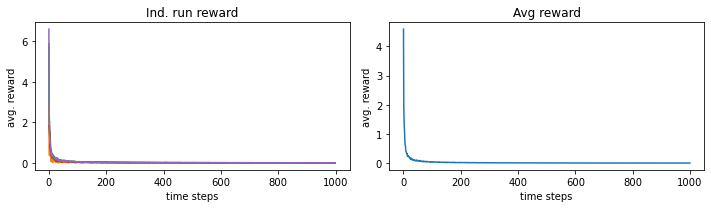

In [51]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Ind. run reward')

plt.plot(avg_r.T)

plt.ylabel('avg. reward')    
plt.xlabel('time steps') 

plt.subplot(1,2,2)
plt.title('Avg reward')

plt.plot(np.mean(avg_r,axis=0))


plt.ylabel('avg. reward')    
plt.xlabel('time steps') 
plt.tight_layout()
plt.show()

**1e**. In an **$\epsilon$-greedy strategy**, we select the greedy action most of the time, but sometimes (i.e. with a small probability $\varepsilon$, we will select a random action. 

* Initialize $Q_{t}(a)$ by sampling from the unit normal distribution $\mathcal N(0, 1)$.   

* At each time step, select an action and observe the reward  according to the $\epsilon$-greedy strategy. Then, update your estimate $Q_{t}(a)$. Implement a $\epsilon$-greedy strategy by selecting a random action with probability $\epsilon$ and the optimal action otherwise. Do this for 1000 steps. Save the reward for each step. 

* Repeat the above steps 5 times. For each run, plot the average reward vs. time (x-axis: time, y-axis: average reward, which is the total reward divided by the number of time steps so far)  

* Average the average reward traces across runs into 1 grand-mean reward trace across time. We'll use this to compare the performance of different policies.  

*  Repeat this for  $\epsilon=0.01, 0.1, 0.5$.  

<font color="red"> Your answer in code </font>

* For what value of $\epsilon$ is an $\epsilon$-greedy strategy equivalent to a greedy strategy?  

<font color="red"> Your answer in red text </font>


* For what value of $\epsilon$ is an $\epsilon$-greedy strategy equivalent to a random strategy (where you select actions at random)?  

<font color="red"> Your answer in red text </font>


* Plot the grand mean reward trace for different values of $\epsilon$ and for the greedy policy. 
 
<font color="red"> Your answer in code </font>

* What is the best value of $\epsilon$? Why is this the case?  

<font color="red"> Your answer in red text </font>

**(9 points)**


In [80]:
def bandit_e_greedy_policy(Q, params):
    e = params
    
    np.random.seed(None)#reset
    p = np.random.random()
    if e > p:
        return bandit_random_policy(Q, params)
    return bandit_greedy_policy(Q, params)


In [83]:
avg_r_e_greedy = np.zeros((3, n_steps))
epsilons = [0.01,0.1,0.5]


for e_i, e in enumerate(epsilons):
    avg_r_e = np.zeros((5, n_steps))

    for i in range(5):
        np.random.seed(i)
        Q = np.random.normal(0, 1, size=k)

        r = estimate_values(Q, bandits, bandit_e_greedy_policy, epsilons[0],
                            n_steps=n_steps, k=k, seed=i)
        avg_r_e[i] = r/range(1,n_steps+1)
    avg_r_e_greedy[e_i] = np.mean(avg_r_e, 0)



Text(0.5, 0, 'time steps')

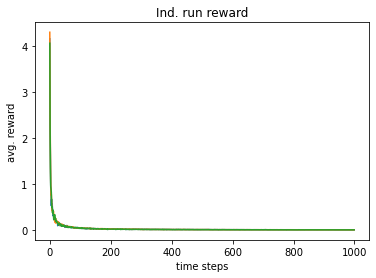

In [84]:
plt.title('Ind. run reward')

plt.plot(avg_r_e_greedy.T)

plt.ylabel('avg. reward')    
plt.xlabel('time steps') 


**1f**. Discuss a  situation in your life that can be accurately modeled using a bandit problem. **(1 points)**

<font color="red"> Your answer in red text </font>

* Discuss 2 decision making problems that cannot be modeled using a bandit problem and why. **(2 points)**

<font color="red"> Your answer in red text </font>


# Question 2:  Finite Markov Decision Processes


In this question, we will develop the formalism of a Markov Decision
Process (MDP), which is a model of an agent interacting with an environment with some extra conditions.  The learner and decision maker is called the **agent**.  The agent  interacts with  the **environment**, which can be modeled as having a set of states $\mathcal S$, but at time $t$ its state is $S_t\in \mathcal S$. Having observed this, the agent selects an action $A_t$. In response to the agent's action $A_t$, the environment emits a numerical reward $R_{t+1}$ and moves to a new state $S_{t+1}\in \mathcal S$ 

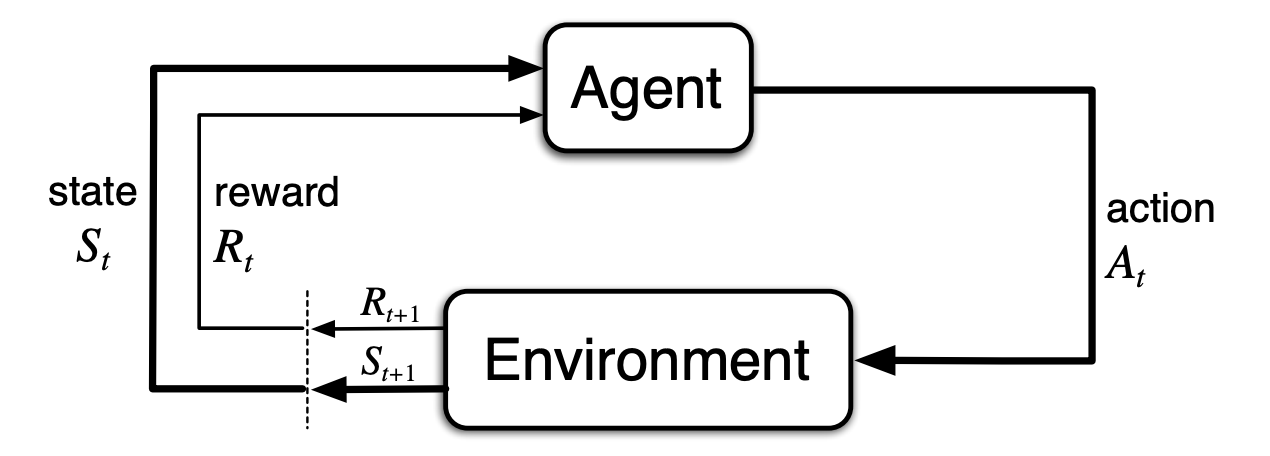

In a finite MDP, the set of possible states, actions, and rewards $(\mathcal{S}, \mathcal{A}$, and $\mathcal{R})$ all have a finite number of elements. Then,  the random variables $R_{t}$ and $S_{t}$ have well defined discrete probability distributions dependent only on the preceding state and action. More explicitly, you can imagine that the reward $R_t$ can depend on the entire trajectory of states and actions you take (e.g. In a video game, you only win when you've visited all the levels in a specific way). However, in an MDP, we assume that the current reward $R_t$ and next state $S_{t+1}$ have a joint probability distribution that depends only on the current state and action. This is called the **Markov property** and where the MDP derives its name. 
$$P\left(s^{\prime}, r \mid s, a\right) =\operatorname{P}\left\{S_{t}=s^{\prime}, R_{t}=r \mid S_{t-1}=s, A_{t-1}=a\right\}$$

Suppose a mouse is navigating a 7 by 7 rectangular grid in search of a juice reward (converted to a numerical quantity). At every cell in the grid, the mouse can choose to go in 4 directions: up, down, left, or right, which  moves the mouse to the cell in the corresponding direction. If the mouse is at an edge cell, actions that go off the grid do nothing to the mouse's position, but gives a reward of -5. If the mouse is not at the goal state (but still inside the grid), it receives a reward of -1. The mouse always starts at the upper left, and when it reaches the bottom right, it receives a reward of +100 and the mouse is then moved back to the start position. In the middle of the grid, the central cell is a false goal. If the mouse reaches this cell, it receives a reward of +10, but is moved back to the start position (i.e. instead of the usual reward of -1).

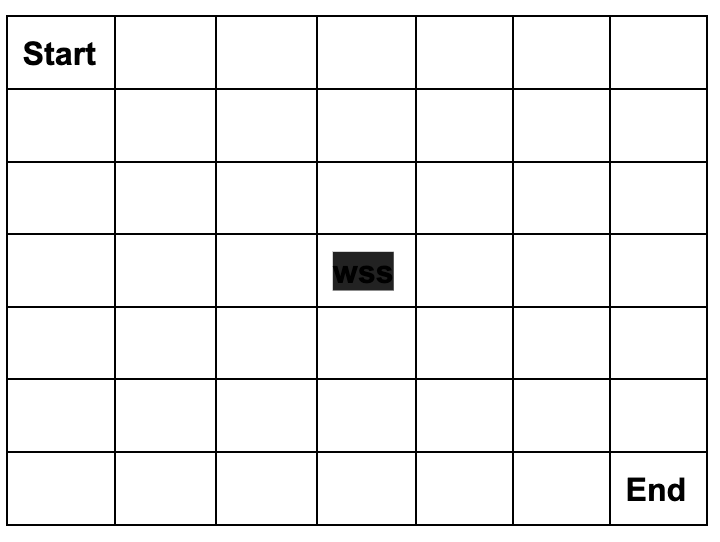

**2a**. What are the states of this reinforcement learning problem? Is this problem an MDP? Why? **(2 points)**

<font color="red"> Your answer in red text </font>



**2b**. A useful concept in MDPs is the value function. The value function is the expected long-term return of starting at a certain state $s$ while following a policy $\pi$
$$v_{\pi}(s) = \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s\right]$$

$G(t)$ is the long-term return of the agent, defined by
$$ G_t=R_t+\gamma R_{t+1}+\gamma^2 R_{t+2} + \ldots$$
where $\gamma$ is a discount factor which we will set to 0.95 (so that the future is discounted by 5%).

Note that the value function of a state is dependent on the policy, so that what you decide to do overall can influence the values of states. i.e. The values of states are not an intrinsic property of the world, but they depend on what you decide to do. This is what makes credit assignment so difficult. 

Given a certain policy, TD learning is a way to estimate the value of a state $V(S_t)$ (encountered at time $t$) so that
$ V(S_t) \approx v_{\pi}(S_t)$

By definition, the TD estimate is
$$V\left(S_{t}\right) \leftarrow V\left(S_{t}\right)+\alpha\left[R_{t+1}+\gamma V\left(S_{t+1}\right)-V\left(S_{t}\right)\right]$$
where $\leftarrow$ is the assignment operator, $R_{t+1}$ is the reward observed after time $t$, $S_{t+1}$ is the state observed after time $t$, $\alpha$ is a step size parameter (which we will set to 0.01)

* Let us consider the random policy: Suppose the mouse selects actions at random with uniform probability of 1/4 at every cell. 
* Initialize a random $7\times 7$ matrix $V$ that will hold the estimated values for each state. 

* Use TD learning to estimate the value of all states according to the random policy. Do this for 50000 time steps. A movement from one cell to the next counts as one time step. Store the reward received each time step. 

* Repeat the above 2 steps 5 times. Plot the average reward against time step (x-axis: time step (one movement from cell to adjacent cell) , y-axis: average reward = total reward received so far divided by number of time steps so far). You should have 5 lines here, one line for each simulation.  Save this somewhere. We'll use this to compare between different policies later. 

* For each run, visualize the values of each state under the random policy using `imshow`. 

<font color="red"> Your answer in code </font>

* Describe the plot you see regarding the values of each state. Do these values make sense, given that we're using the random policy? What about the value of the false goal? How does its value compare to the value of the surrounding states? Why is this the case?  

<font color="red"> Your answer in red text </font>


**(8 points)**


**2c**. Now, let us consider the greedy policy. At each state, choose the action that will result in the best possible following state.

* Initialize a random $7\times 7$ matrix $V$ that will hold the estimated values for each state.  

* Use TD learning to estimate the value of all states according to the greedy policy. Do this for 50000 time steps. Store the reward received each time step.  

* Repeat the above 2 steps 5 times. Plot the average reward against time step (x-axis: time step (one movement from cell to adjacent cell), y-axis: average reward = total reward divided by number of time steps so far). You should have 5 lines here, one line for each simulation.  Save this somewhere. We'll use this to compare between different policies later.  

* For each simulation, visualize the values of each state under the random policy using `imshow`. 

<font color="red"> Your answer in code </font>

* Describe the plot you see regarding the values of each state. Do these values make sense, given that we're using the greedy policy?

<font color="red"> Your answer in red text </font>

**(6 points)**



**2d**. Now, let us consider the $\epsilon$-greedy policy. At each state, with a probability $\epsilon=0.1$, choose a random action, otherwise choose the action that will result in the best possible following state.

* Initialize a random $7\times 7$ matrix $V$ that will hold the estimated values for each state.  

* Use TD learning to estimate the value of all states according to the $\epsilon$-greedy policy. Do this for 50000 time steps. Store the reward received each time step.  

* Repeat the above 2 steps 5 times. Plot the average reward against time step (x-axis: time step (one movement from cell to adjacent cell), y-axis: average reward = total reward divided by number of time steps so far). You should have 5 lines here, one line for each simulation.  Save this somewhere. We'll use this to compare between different policies later.  
* For each simulation, visualize the values of each state under the random policy using `imshow`. 

<font color="red"> Your answer in code </font>

* Describe the plot you see regarding the values of each state. Do these values make sense, given that we're using the greedy policy? 

<font color="red"> Your answer in red text </font>

* Repeat the above steps for $\epsilon=0.01, 0.1, 0.5$  

<font color="red"> Your answer in code </font>


**(7 points)**

**2e**. For each policy (random, greedy, 0.01-greedy, 0.1-greedy, 0.5-greedy), average the average rewards vs. time across the 5 runs. 
* Plot these for each policy (x-axis: first 3000 time steps, y-axis: average reward).

<font color="red"> Your answer in code </font>

* Which policy is the best? Why do you think this is the case? **(2 points)**

<font color="red"> Your answer in red text </font>

* What do you notice about the dynamics of each policy? Which policy performs the best early on, in the middle, and at the end? **(2 points)**

<font color="red"> Your answer in red text </font>


**2f**. Now suppose that $\gamma=0.001$. For each policy (random, greedy, 0.01-greedy, 0.1-greedy, 0.5-greedy), compute the average rewards vs. time across 5 runs. 
* Plot these for each policy (x-axis: first 3000 time steps, y-axis: average reward).
<font color="red"> Your answer in code </font>

* How does decreasing the $\gamma$ parameter affect the behavior of the mouse? Support this answer by plotting the values of each state. **(2 points)** 

<font color="red"> Your answer in red text </font>

* Which policy is the best now? Why do you think this is the case? **(2 points)**

<font color="red"> Your answer in red text </font>

* Now, what do you notice about the dynamics of each policy? Which policy performs the best early on, in the middle, and at the end? How does this compare with the case when $\gamma=0.95$? **(2 points)**

<font color="red"> Your answer in red text </font>


**2g**. What is a weakness of the TD algorithm? Suggest 1 way to improve the performance of the TD algorithm on this task. **(2 points)**

<font color="red"> Your answer in red text </font>


